# 자연어처리 시작하기 - 전처리, 토큰화, 명사추출
* soynlp(https://github.com/lovit/soynlp)로 토큰화하고 명사를 추출해 워드클라우드 그려보기

In [11]:
!pip install soynlp

  Using cached https://files.pythonhosted.org/packages/11/8d/d147e7b4adf0625d471387856aacfaabfb8e7e49e479009eabc45f727966/soynlp-0.0.492-py3-none-any.whl


In [2]:
!pip show soynlp

In [5]:
import pandas as pd
import numpy as np
import re

In [6]:
df = pd.read_csv('data/foo1.csv', engine='python', encoding='utf-8')
df

,Unnamed: 0,본문,제목
0,0,그런데 박지원 의원은 문제의 동영상을 지난 2013년 3월 초에 경찰에게 받아서 박...,"""김학의 동영상, 3월 초 경찰이 제공""…시점·이유 규명해야"
1,1,SUB_TITLE_STARTSUB_TITLE_END문재인 대통령의 ‘입’인 김의겸 ...,위기 내몰린 청와대 ‘메신저’…‘엇나간 해명’까지 사퇴 여론
2,2,별장 성폭력 의혹의 당사자인 김학의 전 법무부 차관과 친분이 있는 것으로 알려진 정...,[여의도 사사건건] 정두언 “김학의는 같은 반 친구…나도 별장 초대받아”
3,3,[앵커]그런데 이 문제와 관련해서 박영선 중소기업부 장관 후보자가 어제 청문회에서 ...,"말 바꾼 박영선 ""CD는 안보여줬다"", 野 ""청문회 거짓진술"""
4,4,"[앵커]뉴스 줌인 시간입니다. 정윤섭 기자 나와 있습니다.정 기자, 어떤 소식인...",[뉴스줌인] “보관 장소는 하느님만 안다”…박지원의 수첩
5,5,[앵커]비하인드뉴스 시작을 하겠습니다. 수첩을 못 전해 드렸네요. 박성태 기자가 나...,[비하인드 뉴스] 박지원이 해석한 '6년 전 황교안'
6,6,"""2013년 3월 13일 黃 만나"" 일정표 공개…6년 전 법사위서 ""黃, 김학의 사...","박영선 ""6년 전 황교안, 김학의 얘기에 당황…귀까지 빨개져""(종합2보)"
7,7,【서울=뉴시스】임종명 기자 = 박영선 중소벤처기업부 장관 후보자가 2013년 당시 ...,박영선-황교안 만난 날 김주현 법무부 기조실장 동석 가능성
8,8,[뉴스데스크]◀ 앵커 ▶서울 동작구 흑석동의 재개발 예정집니다.청와대 김의겸 대변인...,26억 재개발 '올인'…김의겸 대변인이 샀다는 건물 가 봤더니…
9,9,"[곽재훈 기자]문재인 정부 2기 장관 후보자 인사청문회와 관련, 자유한국당은 7개 ...",文정부 다주택자 비판한 한국당 의원들 재산 살펴보니…


## 자신의 관심사에 맞는 단어로 데이터를 가져옵니다.

In [7]:
p = r'.*(비행기|여행|언어|호텔).*'
care = df[df['제목'].str.match(p) |
           df['본문'].str.match(p, flags=re.MULTILINE)]
care.shape

(5, 3)

In [8]:
df.sample(10)
care.head()

,Unnamed: 0,본문,제목
26,26,"[뉴스데스크]◀ 앵커 ▶지금부터는 버닝썬 게이트 관련, MBC의 단독 보도를 시작합...","[단독] '불법촬영' 어디까지…정준영 본인마저 ""또 나왔냐"" 한숨"
28,28,불법 촬영물 유포 혐의로 구속된 가수 정준영(30)씨가 경찰이 영상을 제시할 때마다...,"""정준영, 몰카 영상 제시할 때마다 '또 나왔냐'며 한숨"""
36,36,"[오마이뉴스 글:서부원, 편집:최은경]이 글로 지난 한 달간 연재했던 '독일에서 숨...","독일에서 한달살이, 가슴에 꽂힌 일곱 장면"
39,39,[오마이뉴스 오문수 기자]33일간의 남미여행 마지막 도시는 브라질의 옛 수도인 리우...,브라질 빈민가 사진 찍었다가 가이드가 질겁
54,54,[아시아경제 김종화 기자]지난 10일(현지시간) 에티오피아를 떠나 케냐로 향하던 에...,"[과학을읽다]""왜 비행기사고는 났다하면 전원 사망인가요?"""


In [9]:
df.tail()

,Unnamed: 0,본문,제목
55,55,[아시아경제 이지은 인턴기자] 삼성전자 폴더블 스마트폰 ‘갤럭시폴드’의 디스플레이 ...,"“갤럭시 폴드, 디스플레이 가운데 주름이?”…실제 사용 영상 보니"
56,56,애플이 2015년 이후 맥북과 맥북 프로에 새롭게 적용한 3세대 버터플라이 키보드 ...,"애플, 맥북 '키보드 결함' 추가 사과 했지만..."
57,57,[서울경제] 이동통신사 애플리케이션을 선탑재하지 않은갤럭시 S10 5G ‘언락폰(공...,통신사도 갤S10 5G '공기계' 판매한다
58,58,SK텔레콤의 5G(세대) 이동통신 요금제 인가 결정이 이번주 내려질 전망이다. 이번...,"중저가 5G요금 통과 앞뒀지만… ""실감영상 즐길 수 있겠나"""
59,59,[서울신문 나우뉴스]현재 미국과 여러 서방 국가에서 운용 중인 UH-60 블랙호크나...,[핵잼 사이언스] 블랙호크 대체할 ‘슈퍼 헬리콥터’ 뜬다…SB-1 초도비행 성공


In [12]:
from soynlp.tokenizer import RegexTokenizer

tokenizer = RegexTokenizer()
tokenizer

In [13]:
# 샘플로 보고 싶은 인덱스의 번호를 넣어주세요.
sample_index = 7

In [14]:
sample_title = df['본문']
sample_title

0     그런데 박지원 의원은 문제의 동영상을 지난 2013년 3월 초에 경찰에게 받아서 박...
1     SUB_TITLE_STARTSUB_TITLE_END문재인 대통령의 ‘입’인 김의겸 ...
2     별장 성폭력 의혹의 당사자인 김학의 전 법무부 차관과 친분이 있는 것으로 알려진 정...
3     [앵커]그런데 이 문제와 관련해서 박영선 중소기업부 장관 후보자가 어제 청문회에서 ...
4     [앵커]뉴스 줌인 시간입니다.  정윤섭 기자 나와 있습니다.정 기자,  어떤 소식인...
5     [앵커]비하인드뉴스 시작을 하겠습니다. 수첩을 못 전해 드렸네요. 박성태 기자가 나...
6     "2013년 3월 13일 黃 만나" 일정표 공개…6년 전 법사위서 "黃, 김학의 사...
7     【서울=뉴시스】임종명 기자 = 박영선 중소벤처기업부 장관 후보자가 2013년 당시 ...
8     [뉴스데스크]◀ 앵커 ▶서울 동작구 흑석동의 재개발 예정집니다.청와대 김의겸 대변인...
9     [곽재훈 기자]문재인 정부 2기 장관 후보자 인사청문회와 관련, 자유한국당은 7개 ...
10    [뉴스데스크]◀ 앵커 ▶9년 전 한 대형마트에서 5천원이라는 파격적인 가격으로 인기...
11    [앵커]이번 박삼구 금호아시아나그룹 회장의 퇴진은 조양호 한진그룹 회장이 주주의 심...
12    [앵커]출산율이 빠르게 떨어지면서 인구감소 시계가 돌아가는 속도도 빨라졌습니다. 통...
13    김의겸 대변인의 해명을 다시 정리해 보면 지난 30년 동안 집 없이 살아왔는데 청와...
14    25일 오후 6시경 서울 영등포역 인근의 얌샘김밥 매장. 저녁 식사 시간이라 밀려드...
15    50년새 15~64세 3천757만명→1천784만명…소비·투자 등 성장 악영향고령인구...
16    [ 전설리 기자/김진수 기자/김낙훈 전문기자  ]얼마 전 한 중견기업 사장에게 40...
17    [앵커]한편 대한항공 조양호 회장은 좀 다른 생각인가 봅니다.대표이사직을 잃

In [15]:
sample_content = df['본문'][sample_index]
sample_content

"【서울=뉴시스】임종명 기자 = 박영선 중소벤처기업부 장관 후보자가 2013년 당시 법무부 장관이었던 황교안 자유한국당 대표에게 김학의 전 법무부 차관의 별장 성접대 의혹을 미리 알린 자리에 김주현 기조실장이 동석했다는 주장이 28일 제기됐다.박 후보자는 전날 인사청문회에서 자신이 국회 법제사법위원회 위원장이던 2013년 3월13일 신임 법무부 장관이었던 황 대표를 만나 김 전 차관 의혹을 전하며 임명을 만류한 적이 있다고 밝혔다.황 대표를 비롯한 한국당 측은 이러한 박 후보자의 주장을 부인했다. 그러나 같은 날 황 대표를 만났다는 현역 의원들의 일정이 속속 알려지면서 박 후보자와 황 대표 사이의 진실공방이 새로운 국면을 맞고 있다.우선 박 후보자는 이날 자신의 사회관계망서비스(SNS) 페이스북에 과거 일정표 사진과 함께 황 대표를 만난 시점이 2013년 3월13일 오후 4시40분이라고 공개했다. 황 대표가 당시 법무부 장관으로 취임한 날은 3월11일, 취임 이틀이 지난 때였다.황 대표는 박 후보자를 만나기 전인 오후 3시50분에는 더불어민주당 소속인 박병석 당시 국회 부의장을 만난 것으로 전해졌다.또 박 후보자를 만난 뒤인 오후 5시15분에는 법사위원이었던 박지원 민주평화당 의원을 만났다. 박 의원은 이날 국회 의원회관에서 진행된 간담회에서 6년 전 수첩을 꺼내보이며 이러한 사실을 밝혔다.박 의원이 공개한 2013년도 수첩 3월13일에는 '5:15 황교안 법무부 장관, 김주현 기조실장'이라고 적혀있었다. 박 후보자가 황 대표를 만난 날, 박 의원도 황 대표를 만났을 뿐 아니라 김주현 당시 법무부 기조실장이 동석했음이 드러난 것이다.정치권에서는 이를 근거로 박 후보자를 만났을 때도 김 실장이 함께 했을 것이라고 추정한다. 통상 신임 장관이 국회 예방 일정을 소화할 때 기조실장 등 부처 주요 인사가 동행한다는 이유에서다.무엇보다 황 대표가 박 후보자의 주장을 재차 부인하고, 한국당 측은 박 후보자에 대한 고발 조치를 검토하겠다고 밝힐 정도로 거센 공방이 오가는 

# 토큰화

In [16]:
tokened_title = tokenizer.tokenize(sample_content)
tokened_title

['【',
 '서울',
 '=',
 '뉴시스',
 '】',
 '임종명',
 '기자',
 '=',
 '박영선',
 '중소벤처기업부',
 '장관',
 '후보자가',
 '2013',
 '년',
 '당시',
 '법무부',
 '장관이었던',
 '황교안',
 '자유한국당',
 '대표에게',
 '김학의',
 '전',
 '법무부',
 '차관의',
 '별장',
 '성접대',
 '의혹을',
 '미리',
 '알린',
 '자리에',
 '김주현',
 '기조실장이',
 '동석했다는',
 '주장이',
 '28',
 '일',
 '제기됐다',
 '.',
 '박',
 '후보자는',
 '전날',
 '인사청문회에서',
 '자신이',
 '국회',
 '법제사법위원회',
 '위원장이던',
 '2013',
 '년',
 '3',
 '월',
 '13',
 '일',
 '신임',
 '법무부',
 '장관이었던',
 '황',
 '대표를',
 '만나',
 '김',
 '전',
 '차관',
 '의혹을',
 '전하며',
 '임명을',
 '만류한',
 '적이',
 '있다고',
 '밝혔다',
 '.',
 '황',
 '대표를',
 '비롯한',
 '한국당',
 '측은',
 '이러한',
 '박',
 '후보자의',
 '주장을',
 '부인했다',
 '.',
 '그러나',
 '같은',
 '날',
 '황',
 '대표를',
 '만났다는',
 '현역',
 '의원들의',
 '일정이',
 '속속',
 '알려지면서',
 '박',
 '후보자와',
 '황',
 '대표',
 '사이의',
 '진실공방이',
 '새로운',
 '국면을',
 '맞고',
 '있다',
 '.',
 '우선',
 '박',
 '후보자는',
 '이날',
 '자신의',
 '사회관계망서비스',
 '(',
 'SNS',
 ')',
 '페이스북에',
 '과거',
 '일정표',
 '사진과',
 '함께',
 '황',
 '대표를',
 '만난',
 '시점이',
 '2013',
 '년',
 '3',
 '월',
 '13',
 '일',
 '오후',
 '4',
 '시',
 '40',
 '분이라고',
 '공

In [17]:
tokened_content = tokenizer.tokenize(sample_content)
tokened_content[:10]

['【', '서울', '=', '뉴시스', '】', '임종명', '기자', '=', '박영선', '중소벤처기업부']

In [18]:
print(len(tokened_content))

373


# 텍스트 데이터 전처리 
* 개행문자 제거

In [19]:
def preprocessing(text):
    # 개행문자 제거
    text = re.sub('\\\\n', ' ', text)
    return text

In [20]:
# %time을 찍어주면 해당 코드를 실행할 때 걸리는 시간을 출력해 줍니다
%time sentences = df['본문'].apply(preprocessing)

Wall time: 1.01 ms


In [21]:
%time tokens = sentences.apply(tokenizer.tokenize)
tokens[:3]

Wall time: 151 ms


0    [그런데, 박지원, 의원은, 문제의, 동영상을, 지난, 2013, 년, 3, 월, ...
1    [SUB, _, TITLE, _, STARTSUB, _, TITLE, _, END,...
2    [별장, 성폭력, 의혹의, 당사자인, 김학의, 전, 법무부, 차관과, 친분이, 있는...
Name: 본문, dtype: object

In [22]:
tokens[9][:10]

['[', '곽재훈', '기자', ']', '문재인', '정부', '2', '기', '장관', '후보자']

In [27]:
stopwords_kr = ['하지만', '그리고', '그런데', '저는','제가',
                '그럼', '이런', '저런', '합니다',
                '많은', '많이', '정말', '너무','[',']','것으로','했습니다','했다','있다'] 

In [24]:
!pip install wordcloud

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(
                        font_path = '/Library/Fonts/NanumBarunGothic.ttf', 
                        stopwords = stopwords_kr,
                        background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

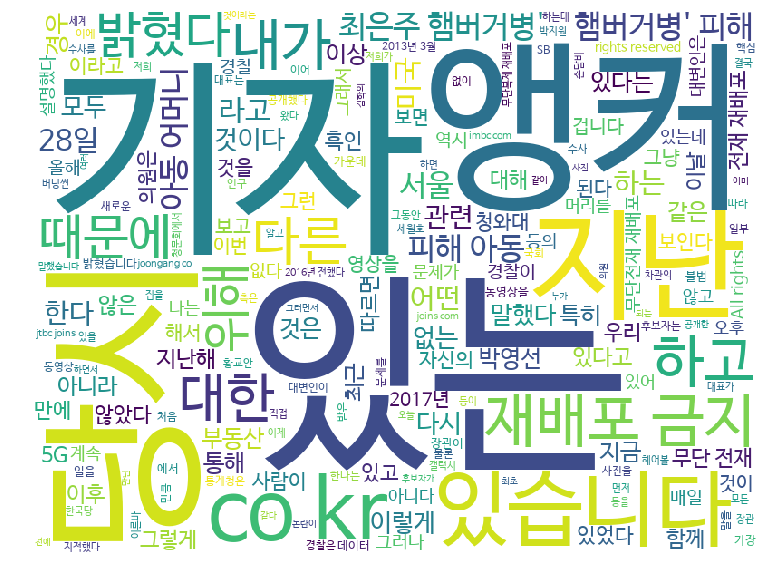

Wall time: 1.96 s


In [29]:
# 결과를 출력해 보면 불용어(STOPWORD)가 너무 많습니다.
%time displayWordCloud(' '.join(sentences))

In [30]:
from soynlp.noun import LRNounExtractor

In [31]:
%%time
noun_extractor = LRNounExtractor(verbose=True)
noun_extractor.train(sentences)
nouns = noun_extractor.extract()

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (2047, 1132) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 442 nouns are extracted
Wall time: 185 ms


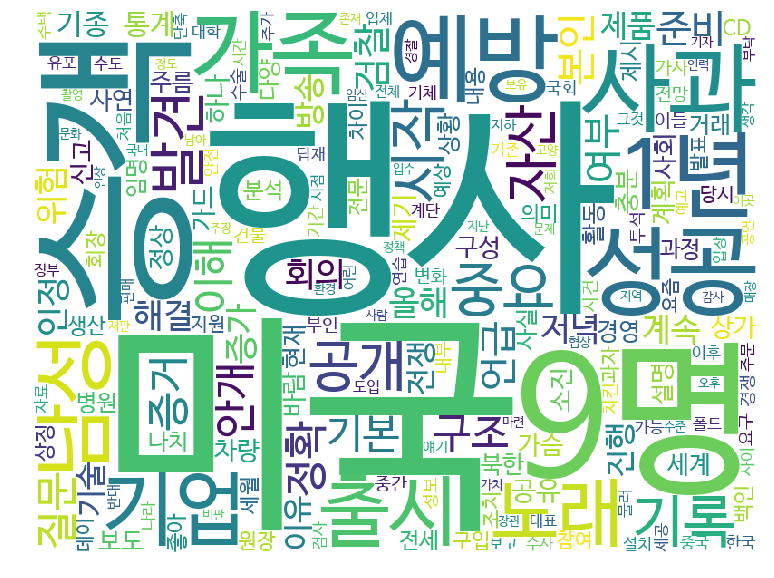

Wall time: 2.06 s


In [34]:
# 추출된 명사를 찍어봅니다.
%time displayWordCloud(' '.join(nouns))